# Linear Regression 개념 정리
* Linear Regression을 Numpy 만으로 구현해 본다.
* 단순화 하기 위해서 계수 1개만으로 제한 한다.
* $y = ax + b$
* $H(x) = Wx + b$
    * $H(x)$ : Hypothesis
    * $W$ : Weight
    * $b$ : bias

## Training Data 만들기
* m개의 데이타를 만든다.
* X 데이타 : np.arange(m)
* y 데이타 : X * 2, 약간의 노이즈를 위해 랜덤한 수에 10을 곱해서 추가한다.
    * `np.random.randn(m)`은 평균이 0이고 표준편차가 1인 난수를 발생한다.
* 데이타를 점으로 표시하고 정답 모델을 선으로 표시한다.

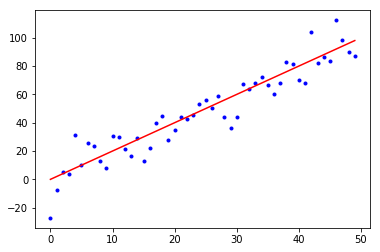

In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = np.arange(m)
y = X  * 2 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')
plt.plot(X, X*2, 'r')

## Hypothesis와 Cost함수
* Hypothesis
    * $H(W) = Wx^{(i)}$
* Cost함수는 MSE를 사용한다.
    * $\text{cost}(W) = \frac{1}{m}\displaystyle\sum_{i=1}^m(H(W) - y^{(i)})^2$
* W 값을 0.1 ~ 4.0까지 0.1씩 증가 하면서 cost를 구해서 시각화한다.
    * $W$의 변화에 따라 Cost의 변화량을 시각화해 보면 MSE 함수는 Convex 함수임을 알 수 있다.


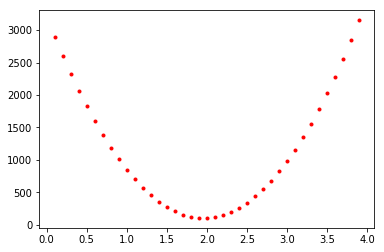

In [3]:
w_range = np.arange(0.1, 4, 0.1) 
costs = np.array([])
for i, w in enumerate(w_range):
    h = w*X
    cost = 1/m * np.sum( (h - y)**2)
    costs = np.append(costs, cost)
    plt.plot(w, cost, 'r.')

## Cost 함수와 Gradient

* Cost 함수가 Convex 함수이기 때문에 최소값을 찾으려면 기울기를 따라 내려가면 된다.
* 미분을 하면 기울기를 얻을 수 있다.
    * $\displaystyle\frac{\partial}{\partial W}cost(W) = \frac{2}{m}\sum_{i=1}^m(H(W) -y^{(i)})x^{(i)}$
* 미분한 결과를 Cost 함수의 변화에 시각화하면 다음과 같다.
* 미분한 결과를 일정한 값(learning_rate)의 비율로 W에서 빼는 것을 반복하다 보면 cost가 가장 작은 W를 찾을 수 있다


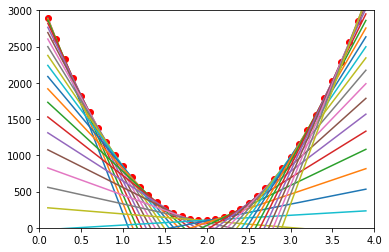

In [4]:
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    h = w*X
    gradient =  2/m * np.sum( (h-y) * X)
    plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
    plt.axis([0, 4, 0, 3000])

## Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

initial W 0.9897073689166694
epoch: 0  cost: 862.1117998668881  gradient: -1566.0203700227873  W: 1.0680083874178088
epoch: 20  cost: 129.80799478550833  gradient: -290.08497667601745  W: 1.7932873093687574
epoch: 40  cost: 104.68062956715765  gradient: -53.73448219699772  W: 1.9276358294679476
epoch: 60  cost: 103.81844029757407  gradient: -9.953616385326507  W: 1.9525221515525473
epoch: 80  cost: 103.78885620349476  gradient: -1.8437784285895829  W: 1.957132020172173
epoch: 100  cost: 103.78784109155431  gradient: -0.3415360570601888  W: 1.9579859385863914
epoch: 120  cost: 103.78780626026122  gradient: -0.06326512799106696  W: 1.9581441159051631
epoch: 140  cost: 103.7878050651034  gradient: -0.011719044993958505  W: 1.9581734162033615
epoch: 160  cost: 103.78780502409421  gradient: -0.0021708011969690235  W: 1.9581788437038476
epoch: 180  cost: 103.78780502268707  gradient: -0.00040211278643937477  W: 1.958179849077968
suspended: 195
Final W: 1.958180007434993


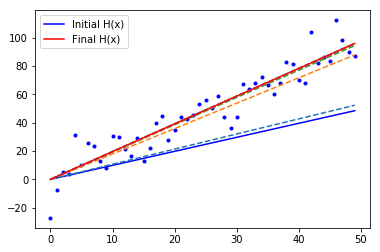

In [5]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

learning_rate = 0.00005
suspend = 0.00001
old_g = None
epochs = 1000
for epoch in range(epochs):
    hypothesis = W * X 
    loss = hypothesis - y
    cost = 1/m * np.sum(loss**2)
    gradient =  2/m * np.sum(loss * X)
    if old_g is not None and abs(gradient - old_g) < suspend:
        print('suspended:', epoch)
        break
    old_g = gradient
    W = W - learning_rate * gradient
    if epoch %20 == 0:
        print('epoch:',epoch,' cost:',cost,' gradient:',gradient, ' W:', W)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()


## Stochastic Gradient Descent
* 모든 샘플에 대해서 비용을 계산하면 샘플수가 많을 수록 계산 속도가 오래 걸린다.
* 각 샘플 중에 랜덤하게 한개만 선택해서 Gradient를 계산해서 속도를 개선한다.
* 단점은 선택한 샘플에 따라 수렴율이 일정하지 않아서 최적치를 찾지 못할 수 있다.
    * 학습률을 처음에는 크게 했다가 점진적으로 감소시켜야 한다.
    * 매 반복에서 학습률을 결정하는 함수를 학습 스케쥴(learning schedule)이라고 한다.

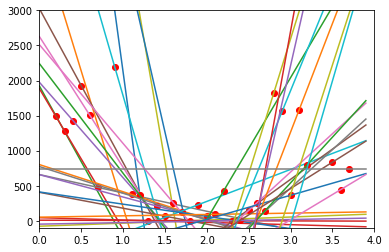

In [6]:
learning_rate = 0.1
w_range = np.arange(0, 4, learning_rate)
for i, w in enumerate(w_range):
    random_i = np.random.randint(m)
    xi = X[random_i]
    yi = y[random_i]
    h = w*xi
    sgd_cost = (h - yi)**2
    plt.plot(w, sgd_cost, 'ro')
    sgd_gradient =  2 *(h-yi) * xi
    plt.plot(w_range, sgd_gradient*(w_range-w) +sgd_cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
    plt.axis([0, 4, -100, 3000])

initial W 0.1295919341095697
epoch: 0 cost: 1.1076931890099036e+34  gradient: -9.051242359984206e+18  W: 1.2893483997227504e+16 learn_rate: 0.001694915254237288
epoch: 5 cost: 4.271393635585481e+129  gradient: 3.39850678837385e+66  W: -1.5321529617915362e+63 learn_rate: 0.0011904761904761906
epoch: 10 cost: 6.073319108309722e+136  gradient: -8.37899569710239e+69  W: -6.809380332237747e+66 learn_rate: 0.0009174311926605505
epoch: 15 cost: 1.0234479355226503e+92  gradient: 4.2489553519211694e+47  W: 1.6465474931295023e+44 learn_rate: 0.0007462686567164179
epoch: 20 cost: 3407202279193.364  gradient: 162435754.83886978  W: -60207.5053263167 learn_rate: 0.0006289308176100629
epoch: 25 cost: 1.719658501261106  gradient: 55.077015135395555  W: 2.1138635615715486 learn_rate: 0.0005434782608695652
epoch: 30 cost: 420.1893436870175  gradient: -2008.8550113858682  W: 2.3222704895409905 learn_rate: 0.0004784688995215311
epoch: 35 cost: 83.0092999207113  gradient: 674.2098533585927  W: 1.790019459

[0, 50, 0, 100]

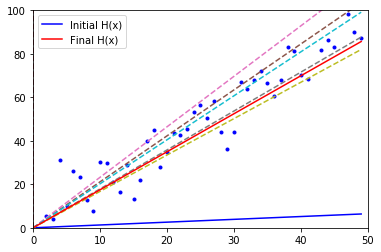

In [7]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
for epoch in range(epochs):
    for i in range(m):
        random_i = np.random.randint(m)
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = (h-yi)**2
        gradient = 2*(h-yi) * xi
        learning_rate = t0/(t1 + (epoch * m + i*10))
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

## Mini-Batch Gradient Descent
* Batch GD와 Stochastic GD를 혼합한 형태
* 임의의 작은 샘플 셋트에 대해서 그레이디언트를 계산
* SGD에 비해 덜 불규칙하고 더 정확한 최소값에 도달
* 지역 최소값에 빠질 가능성 높음(Convex 함수가 아닌경우)


initial W 0.3000061918210253
epoch: 0 cost: 5.289308819548817e+21  gradient: 4226720888455.74  W: -39764413472.65258 learn_rate: 0.01
epoch: 5 cost: 1.1044560276787858e+71  gradient: -1.3611889773407404e+37  W: 7.870489437413655e+32 learn_rate: 0.00125
epoch: 10 cost: 2.4196314141166262e+64  gradient: -6.617072620869025e+33  W: -2.9019169053501656e+30 learn_rate: 0.0006666666666666666
epoch: 15 cost: 7.978045662981642e+17  gradient: 53227470124.345  W: 5782871.50969588 learn_rate: 0.00045454545454545455
epoch: 20 cost: 78.36661347966262  gradient: -420.05698979974335  W: 1.9185922451346535 learn_rate: 0.0003448275862068965
epoch: 25 cost: 233.04613676309475  gradient: 41.095582629848266  W: 1.874529596884929 learn_rate: 0.0002777777777777778
epoch: 30 cost: 226.42943049955636  gradient: -662.9763807536452  W: 2.0947142027842265 learn_rate: 0.00023255813953488373
epoch: 35 cost: 80.27895358413434  gradient: -118.91297515773677  W: 1.8847120231932155 learn_rate: 0.0002
epoch: 40 cost: 17

[0, 50, 0, 100]

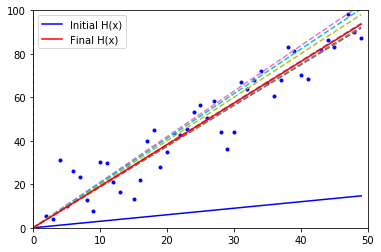

In [8]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
batches = 5
for epoch in range(epochs):
    for i in range(int(m/batches)):
        random_i = np.random.randint(0,m, (batches,))
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = 1/batches* np.sum((h-yi)**2)
        gradient = 2/batches* np.sum((h-yi) * xi)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

#  Scikit-learn 구현

W: [[1.99402719]] b: [-1.18295467]


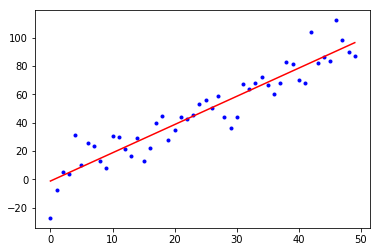

In [16]:
from sklearn.linear_model import LinearRegression

plt.plot(X, y, 'b.')

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))
W = lr.coef_
b = lr.intercept_
print('W:', W, 'b:', b)
plt.plot(X, W.ravel()*X + b, 'r-')